In [68]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [69]:
data = datasets.load_digits().data

In [70]:
data.shape

(1797, 64)

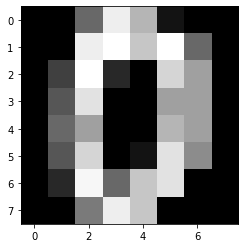

In [71]:
plt.imshow(data[0].reshape(8,8), cmap = 'Greys_r')

In [72]:
model = PCA(n_components =  2, svd_solver = 'full')
result = model.fit_transform(data)
result.shape

(1797, 2)

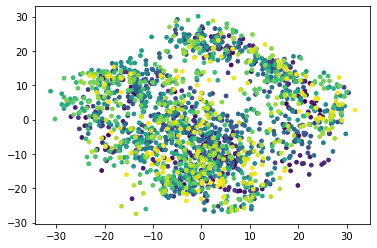

In [73]:
plt.scatter(result[:,0], result[:,1], c=np.arange(1797), s = 14)

In [7]:
new_model =  PCA(svd_solver = 'full')
X = new_model.fit_transform(data)

In [8]:
explained_variance = np.round(np.cumsum(new_model.explained_variance_ratio_),3)
explained_variance_2 = np.round(np.cumsum(new_model.explained_variance_)/new_model.explained_variance_.sum(), 3)

In [9]:
print(explained_variance,explained_variance_2, sep = '\n')

[0.149 0.285 0.403 0.487 0.545 0.594 0.637 0.674 0.707 0.738 0.762 0.785
 0.803 0.821 0.835 0.849 0.863 0.875 0.885 0.894 0.903 0.911 0.919 0.926
 0.933 0.939 0.945 0.95  0.955 0.959 0.963 0.966 0.97  0.973 0.976 0.979
 0.982 0.984 0.986 0.988 0.99  0.992 0.993 0.995 0.996 0.997 0.998 0.999
 0.999 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.   ]
[0.149 0.285 0.403 0.487 0.545 0.594 0.637 0.674 0.707 0.738 0.762 0.785
 0.803 0.821 0.835 0.849 0.863 0.875 0.885 0.894 0.903 0.911 0.919 0.926
 0.933 0.939 0.945 0.95  0.955 0.959 0.963 0.966 0.97  0.973 0.976 0.979
 0.982 0.984 0.986 0.988 0.99  0.992 0.993 0.995 0.996 0.997 0.998 0.999
 0.999 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.   ]


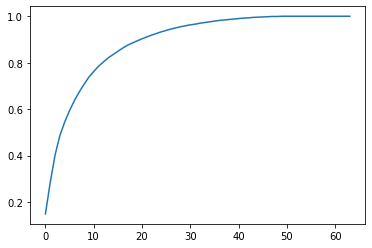

In [10]:
plt.plot(np.arange(64), explained_variance)

In [11]:
scores = np.genfromtxt('X_reduced_50-Copy1.csv', delimiter = ';')
loadings = np.genfromtxt('X_loadings_50-Copy1.csv', delimiter = ';')

In [12]:
F = scores.dot(loadings.T)
F.shape

(200, 200)

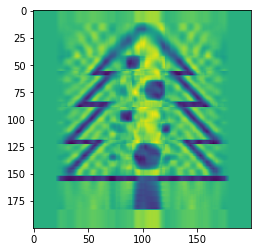

In [13]:
plt.imshow(F)

In [14]:
import pandas as pd

In [16]:
data = pd.read_csv('candy-data-Copy1.csv',  delimiter = ',', index_col = 'competitorname')
data.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1


In [18]:
train_data = data.drop(['100 Grand','3 Musketeers','One dime','One quarter','Air Heads'])

In [21]:
x, y = train_data.drop(['Y', 'winpercent'], axis = 1), pd.DataFrame(train_data['winpercent'])
#print(x,y)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression(n_jobs = -1).fit(x,y)

In [24]:
model.predict([[1, 1, 1, 0, 1, 0, 1, 1, 1, 0.669, 0.456]])

array([[65.1303666]])

In [25]:
model.intercept_

array([32.49207971])

In [26]:
model.coef_

array([[ 27.80862379,  13.22742764,  -1.72139799,   9.31066552,
          2.47147143,   9.97210163,  -7.20313458,  -3.36948719,
         -1.92311592,  12.33760078, -10.75867374]])

Next

In [30]:
k_data = pd.read_csv('Task_data-Copy1.csv', delimiter = ',', index_col = 'id')

In [31]:
k_data.head()

,X,Y,Class
id,,,
1,28,10,1
2,49,49,1
3,48,35,0
4,36,33,1
5,45,53,0


In [40]:
X, y = k_data.drop(['Class'], axis = 1), k_data['Class']

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
model = KNeighborsClassifier(n_neighbors = 3, p = 2)
model.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [50]:
model.predict([[5, -4]])
obj = np.array([5,-4]).reshape(-1,2)
model.predict_proba(obj)

array([[0.33333333, 0.66666667]])

In [52]:
model.kneighbors(obj)

(array([[26.92582404, 34.0147027 , 48.27007354]]),
 array([[0, 5, 3]], dtype=int64))

In [53]:
candy_data = pd.read_csv('candy-data-Copy1.csv', delimiter = ',', index_col = 'competitorname')

In [56]:
train_data = candy_data.drop(['100 Grand','3 Musketeers','One dime','One quarter','Air Heads'])
X = pd.DataFrame(train_data.drop(['winpercent', 'Y'], axis=1))
y = pd.DataFrame(train_data['Y'])

In [57]:
from sklearn.linear_model import LogisticRegression

In [62]:
reg = LogisticRegression(random_state=2019, solver='lbfgs').fit(X,y.values.ravel())

In [63]:
reg.predict_proba([[1, 1, 1, 0, 0, 1, 1, 1, 0, 0.64, 0.76]])

array([[0.16929823, 0.83070177]])

In [67]:
#предсказание для сладости из таблицы
#выбор строки из таблицы
AirHeads = candy_data.loc['Air Heads',:].to_frame().T
#отбор данных для предикторов и предсказание
reg.predict(AirHeads.drop(['winpercent', 'Y'], axis=1))

array([0], dtype=int64)

In [76]:
#чтение тестовых данных и отбор предикторов
test_data = pd.read_csv("candy-test-Copy1.csv", delimiter=',', index_col='competitorname')
X_test = pd.DataFrame(test_data.drop(['Y'], axis=1))

In [78]:
Y_pred = reg.predict(X_test)

In [80]:
Y_pred_probs = reg.predict_proba(X_test)
Y_pred_probs
Y_pred_probs_class_1 = Y_pred_probs[:, 1]

In [81]:
Y_true = (test_data['Y'].to_frame().T).values.ravel()

In [82]:
from sklearn import metrics

In [84]:
fpr, tpr, treshholds = metrics.roc_curve(Y_true, Y_pred)
treshholds

array([2, 1, 0], dtype=int64)

In [85]:
metrics.roc_auc_score(Y_true, Y_pred_probs_class_1)

0.8799999999999999

In [86]:
#вычисление Recall
metrics.recall_score(Y_true, Y_pred)

0.6

In [87]:
#вычисление Precision
metrics.precision_score(Y_true, Y_pred)

0.5

In [88]:
#подключим библиотеки для визуализации
import matplotlib.pyplot as plt
%matplotlib inline

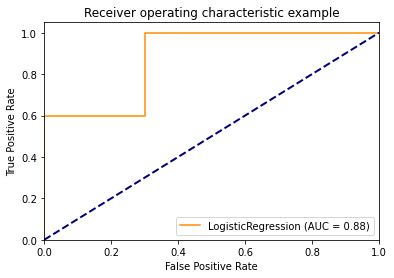

In [89]:
metrics.plot_roc_curve(reg, X_test, Y_true, color='darkorange') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()